In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('agriculturatest.csv')
df_Train = pd.DataFrame(data)
df = df_Train.copy()
df = df.drop(['ID'], axis=1)
df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
88853,3337,1,0,2,10,12.0,44,3,0
88854,3516,1,0,2,10,20.0,38,1,0
88855,3516,1,0,2,15,40.0,8,2,0
88856,3702,1,0,2,10,25.0,18,3,0


In [2]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [3]:
df.dropna(inplace=True)
print(df.isnull().sum())

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64


In [4]:
duplicates = df.duplicated()
duplicates.sum()

623

In [5]:
df.drop_duplicates(inplace=True)

##### Analisis Grafico
  Analisis de la cantidad de insectos presentes por metro cuadrado
Encontramos que el 50% de la cantidad de insectos se encuentran entre 731 y 1889 por metro cuadrado mientras que la media de insectos se establece en 1212. El grafico nos muestra la axistencia de 3 valores atipicos que mas adelante se trataran

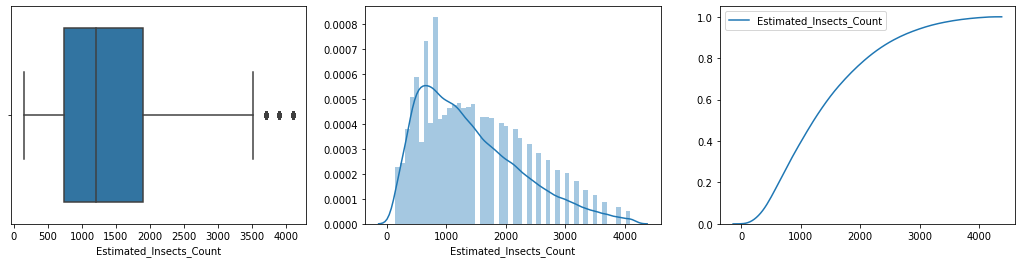

In [6]:
fig, (ax0,ax1,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
sns.boxplot(df['Estimated_Insects_Count'], ax=ax0)
sns.distplot(df['Estimated_Insects_Count'], ax=ax1)
sns.kdeplot(df['Estimated_Insects_Count'], cumulative=True, ax=ax2)
plt.show()

#### Analisis de la cantidad de insectos con relacion a la actividad de agricultura y el tipo de suelo
En la primera grafica encontramos que la relacion de cantidad de insectos con respecto a la actividad se mantiene similar y no tiende influir demasiado el tipo de actividad, se mantienen los valores atipicos antes vistos.
En la segunda grafica se observa que el rango intercuartil para el suelo con valor 1 es menor, los valores de la cantidad de insectos se mantiene mas agrupado con valores pequeños generando asi mayor cantidad de valores atipicos

In [7]:
df['Crop_Type'] = df['Crop_Type'].replace({0:'Cultivo Tipo 1', 1:'Cultivo Tipo 2'})
df['Soil_Type'] = df['Soil_Type'].replace({0:'Suelo Tipo 1', 1:'Suelo Tipo 2'})

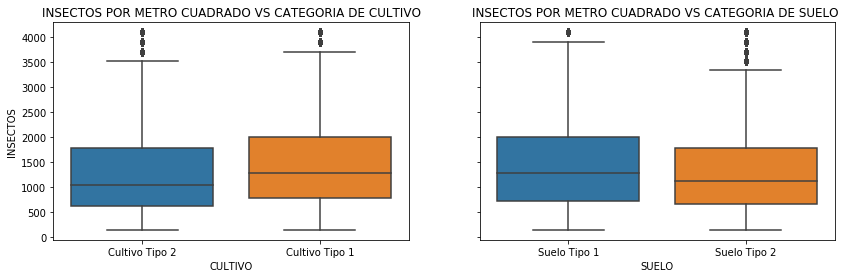

In [8]:
fig, (ax0,ax1) = plt.subplots(ncols=2,nrows=1, figsize=(14,4), sharey=True)
sns.boxplot(x='Crop_Type', y='Estimated_Insects_Count', data=df, ax=ax0)
ax0.set(xlabel='CULTIVO',ylabel='INSECTOS',title='INSECTOS POR METRO CUADRADO VS CATEGORIA DE CULTIVO')
sns.boxplot(x='Soil_Type', y='Estimated_Insects_Count', data=df, ax=ax1)
ax1.set(xlabel='SUELO',ylabel= ' ',title='INSECTOS POR METRO CUADRADO VS CATEGORIA DE SUELO ')
plt.show()


In [9]:
df['Crop_Damage'] = df['Crop_Damage'].replace({0:'Sin Daño', 1:'Daño debido a otras causas', 2:'Daño debido a pesticidas'})
df['Pesticide_Use_Category'] = df['Pesticide_Use_Category'].replace({1:'Nunca', 2:'Usado previamente', 3:'Actualmente en uso'})

#### Relacion de uso de pesticidas y daño de cultivo
Teniendo en cuenta los resultados de la primera grafica 'TIPO DE DAÑO VS CANTIDAD DE CASOS' se observa que los daños en los cultivos son pocos y los que ocurren en su mayor cantidad es debido a causas externas al uso de pesticidas aunque este afecta en menor medidad. Comparando esto con el uso de los mismos vemos que cuando se realiza un uso previo de pesticidas los cultivos permanecen sanos.

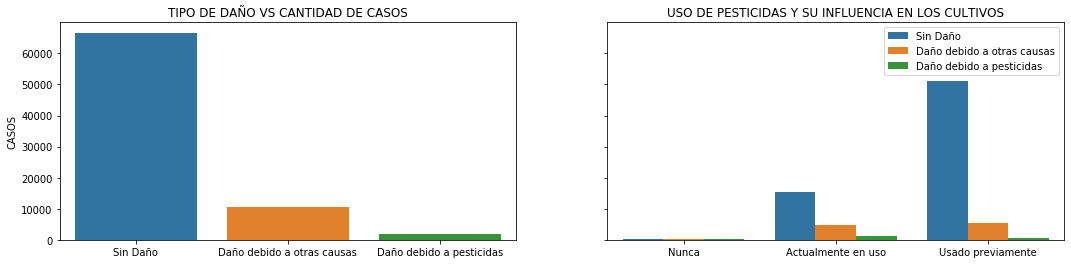

In [10]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(18,4))
sns.countplot(data=df, x='Crop_Damage', ax=ax0)
ax0.set(ylabel='CASOS', xlabel=' ', title='TIPO DE DAÑO VS CANTIDAD DE CASOS')
sns.countplot(data=df, x='Pesticide_Use_Category', hue='Crop_Damage', ax=ax1)
ax1.set(ylabel=' ', xlabel=' ', title='USO DE PESTICIDAS Y SU INFLUENCIA EN LOS CULTIVOS')
plt.legend()
plt.show()


#### Modos de uso de pesticidas y su influencia en los cultivos
El promedio de uso de pesticidas se mantiene de 20 a 40 semanas de uso segun muestran los datos al igual que estos no afectaron negativamente los cultivos por el contrario se observa que en los cultivos con mayores semanas de uso se presentaron mas cultivos sanos.

In [11]:
bins_dosis = [-1,20,40,60,80,100]
bins = [-1,20,40,60,70]
labels = ['0 a 20', '20 a 40','40 a 60','60+']
labels_dosis = ['0 a 20', '20 a 40','40 a 60','60 a 80','80 a 100']
df['Number_Weeks_Used'] = pd.cut(df['Number_Weeks_Used'], bins=bins, labels=labels)
df['Number_Doses_Week'] = pd.cut(df['Number_Doses_Week'], bins=bins_dosis, labels=labels_dosis)
df['Number_Weeks_Quit'] = pd.cut(df['Number_Weeks_Quit'], bins=bins, labels=labels)

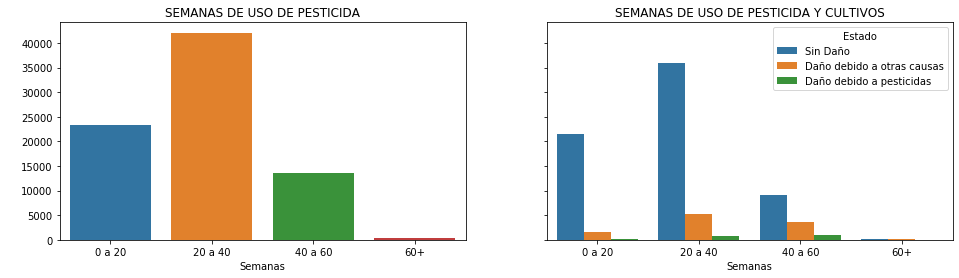

In [12]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16,4))
sns.countplot(x='Number_Weeks_Used', data=df, ax=ax0)
ax0.set(xlabel='Semanas',ylabel= ' ',title='SEMANAS DE USO DE PESTICIDA')
sns.countplot(x='Number_Weeks_Used', hue='Crop_Damage',data=df, ax=ax1)
ax1.set(xlabel='Semanas',ylabel= ' ' ,title='SEMANAS DE USO DE PESTICIDA Y CULTIVOS')
ax1.legend(title='Estado')
plt.show()

#### Dosis por semana y estado de los cultivos

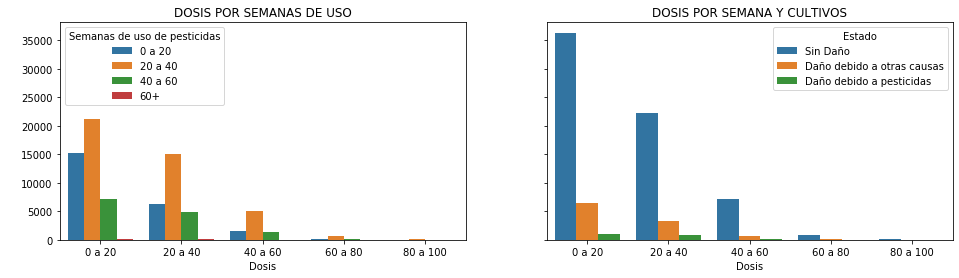

In [13]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16,4))
sns.countplot(x='Number_Doses_Week',hue = 'Number_Weeks_Used', data=df, ax=ax0)
ax0.set(xlabel='Dosis',ylabel= ' ',title='DOSIS POR SEMANAS DE USO')
sns.countplot(x='Number_Doses_Week',hue='Crop_Damage',data=df, ax=ax1)
ax1.set(xlabel='Dosis',ylabel= ' ' ,title='DOSIS POR SEMANA Y CULTIVOS')
ax0.legend(title='Semanas de uso de pesticidas')
ax1.legend(title='Estado')
plt.show()

#### Temporada - Daños Cultivo

Se tenia una caracteristica que reflejaba la temporada de uso de los pesticidas la cual se analizo con respecto al estado de los cultivos mostrando que en su gran mayoria se mantuvieron sanos para las diferentes temporadas

In [14]:
df['Season'] = df['Season'].replace({1:'Temporada 1', 2:'Temporada 2', 3:'Temporada 3'})

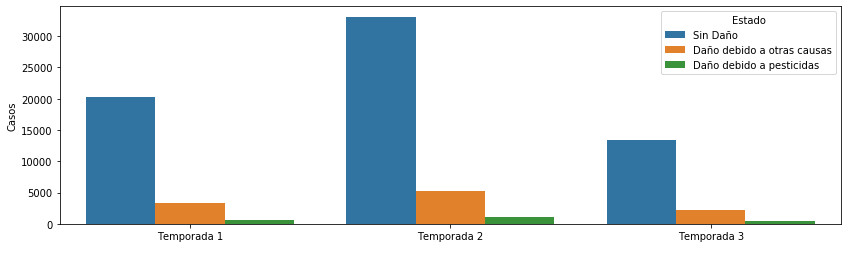

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,4))
sns.countplot(x='Season',hue = 'Crop_Damage', data=df, ax=ax)
ax.set(xlabel=' ', ylabel= 'Casos')
ax.legend(title='Estado')
plt.show()

#### ANALISIS PRE MODELADO

In [16]:
df['Crop_Damage'] = df['Crop_Damage'].replace({'Sin Daño':0, 'Daño debido a otras causas':1, 'Daño debido a pesticidas':2})
df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,Cultivo Tipo 2,Suelo Tipo 1,Nunca,0 a 20,0 a 20,0 a 20,Temporada 1,0
1,209,Cultivo Tipo 2,Suelo Tipo 1,Nunca,0 a 20,0 a 20,0 a 20,Temporada 2,1
2,257,Cultivo Tipo 2,Suelo Tipo 1,Nunca,0 a 20,0 a 20,0 a 20,Temporada 2,1
3,257,Cultivo Tipo 2,Suelo Tipo 2,Nunca,0 a 20,0 a 20,0 a 20,Temporada 2,1
4,342,Cultivo Tipo 2,Suelo Tipo 1,Nunca,0 a 20,0 a 20,0 a 20,Temporada 2,1
...,...,...,...,...,...,...,...,...,...
88853,3337,Cultivo Tipo 2,Suelo Tipo 1,Usado previamente,0 a 20,0 a 20,40 a 60,Temporada 3,0
88854,3516,Cultivo Tipo 2,Suelo Tipo 1,Usado previamente,0 a 20,0 a 20,20 a 40,Temporada 1,0
88855,3516,Cultivo Tipo 2,Suelo Tipo 1,Usado previamente,0 a 20,20 a 40,0 a 20,Temporada 2,0
88856,3702,Cultivo Tipo 2,Suelo Tipo 1,Usado previamente,0 a 20,20 a 40,0 a 20,Temporada 3,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79235 entries, 0 to 88857
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Estimated_Insects_Count  79235 non-null  int64   
 1   Crop_Type                79235 non-null  object  
 2   Soil_Type                79235 non-null  object  
 3   Pesticide_Use_Category   79235 non-null  object  
 4   Number_Doses_Week        79235 non-null  category
 5   Number_Weeks_Used        79235 non-null  category
 6   Number_Weeks_Quit        79235 non-null  category
 7   Season                   79235 non-null  object  
 8   Crop_Damage              79235 non-null  int64   
dtypes: category(3), int64(2), object(4)
memory usage: 7.0+ MB


In [18]:
df_Train_feature = df.drop('Crop_Damage', axis='columns')

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_Train_feature['Estimated_Insects_Count'] = scaler.fit_transform(df[['Estimated_Insects_Count']])
cat_col = df_Train_feature.select_dtypes(include=["category",'object']).columns
df_Train_feature = pd.get_dummies(data=df_Train_feature, columns=cat_col)
df_Train_feature

,Estimated_Insects_Count,Crop_Type_Cultivo Tipo 1,Crop_Type_Cultivo Tipo 2,Soil_Type_Suelo Tipo 1,Soil_Type_Suelo Tipo 2,Pesticide_Use_Category_Actualmente en uso,Pesticide_Use_Category_Nunca,Pesticide_Use_Category_Usado previamente,Number_Doses_Week_0 a 20,Number_Doses_Week_20 a 40,...,Number_Weeks_Used_20 a 40,Number_Weeks_Used_40 a 60,Number_Weeks_Used_60+,Number_Weeks_Quit_0 a 20,Number_Weeks_Quit_20 a 40,Number_Weeks_Quit_40 a 60,Number_Weeks_Quit_60+,Season_Temporada 1,Season_Temporada 2,Season_Temporada 3
0,-1.424668,0,1,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,-1.399969,0,1,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,-1.343515,0,1,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,-1.343515,0,1,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,-1.243543,0,1,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88853,2.278996,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
88854,2.489525,0,1,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
88855,2.489525,0,1,1,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
88856,2.708287,0,1,1,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1


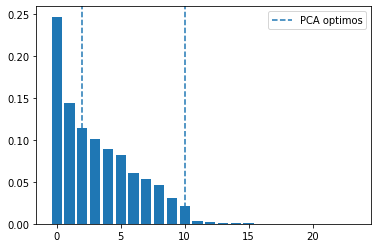

In [20]:
## ANALISIS POR PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(df_Train_feature)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.axvline(x=10, label='PCA optimos', linestyle='--')
plt.axvline(x=2, linestyle='--')
plt.legend()
plt.show()

## UNA BUENA CANTIDAD PARA LOS N_COMPONENTES PUEDE SER  10 0 2

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
X = df.drop('Crop_Damage', axis='columns')
Y = df['Crop_Damage']

In [22]:
numerical = X.select_dtypes(include='int64').columns
categorical = X.select_dtypes(include=['object','category']).columns

Tranform = [('Standard', StandardScaler(), numerical),('CatEncod', OneHotEncoder(), categorical)]
col_trans = ColumnTransformer(transformers=Tranform)

In [23]:
modelos = []
modelos.append(('LoR', Pipeline(steps=[('prepro', col_trans),('reduc', PCA(n_components=2)),('LR', LogisticRegression(solver='lbfgs', max_iter=1000))])))
modelos.append(('LDA', Pipeline(steps=[('prepro', col_trans),('reduc', PCA(n_components=2)),('LDA', LinearDiscriminantAnalysis())])))
modelos.append(('KNN', Pipeline(steps=[('prepro', col_trans),('reduc', PCA(n_components=2)),('KNN', KNeighborsClassifier(n_neighbors=4))])))
modelos.append(('DT', Pipeline(steps=[('prepro', col_trans),('reduc', PCA(n_components=2)),('DT',DecisionTreeClassifier(criterion='entropy'))])))
modelos.append(('BY', Pipeline(steps=[('prepro', col_trans),('reduc', PCA(n_components=2)),('BY', GaussianNB())])))
modelos.append(('XG', Pipeline(steps=[('prepro', col_trans),('reduc', PCA(n_components=10)),('XG', XGBClassifier())])))

name = []
resultados = []
scoring = 'accuracy'

for names, modelo in modelos:
    kfol = KFold(n_splits=10, random_state=7,shuffle=True)
    cros_resultado = cross_val_score(modelo, X,Y, cv=kfol, scoring=scoring)
    resultados.append(cros_resultado)
    name.append(names)
    print(f"{names}: {cros_resultado.mean()*100}% ({cros_resultado.std()*100}%)")


LoR: 84.12318706367567% (0.41806760215573474%)
LDA: 84.05503631845711% (0.40448388668721%)
KNN: 82.7285987039694% (0.3795448124827371%)
DT: 83.06051898564573% (0.4256520289692947%)
BY: 83.59943220534495% (0.4581023455018528%)
XG: 84.22667970992637% (0.4420304572551349%)


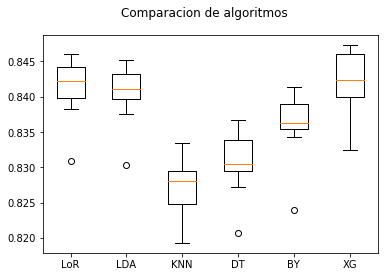

In [24]:
## GRAFICA DE LA COMPARACION DE LOS MODELOS

fig = plt.figure()
fig.suptitle('Comparacion de algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(name)
plt.show()

#### MODELADO

Depues de probar los diferentes modelos y teniendo el gasto computacional se eligio XGBoost para la clasificacion de los datos obtuviendo un accuracy promedio para la competicion logrando asi un resultado favorable el cual se realizo buscando los hiperparametros que mas optimizaran el modelo .

In [25]:
params = {
    'XG__learning_rate': [0.03,0.05,0.10,0.2],
    'XG__max_depth': [3,4,5]
}

In [26]:
from sklearn.model_selection import GridSearchCV
pipe = Pipeline(steps=[('prepro', col_trans),('reduc', PCA(n_components=10)),('XG', XGBClassifier())])
clf = GridSearchCV(pipe, param_grid = params, scoring='accuracy',n_jobs= 1)

In [27]:
clf.fit(X,Y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prepro',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('Standard',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         Index(['Estimated_Insects_Count'], dtype='object')),
                                     

In [28]:
#https://www.kaggle.com/evanmiller/pipelines-gridsearch-awesome-ml-pipelines
#from sklearn.model_selection import train_test_split
#model = Pipeline(steps=[('prepro', col_trans),('reduc', PCA(n_components=10)),('XG', XGBClassifier())])
#model.fit(X,Y)

In [29]:
print(clf.best_params_)
print(clf.best_score_)

{'XG__learning_rate': 0.05, 'XG__max_depth': 5}
0.8437432952609326
